<a href="https://colab.research.google.com/github/josue-do-it/methods4ml/blob/main/optimization_mc4ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Methods for Machine Learning
---

## Problems for Chapter 3: Optimization

# Theoretical
## **Q1. Gradient diffusions.**

###  **(a) Long–time behaviour of the ODE $\sigma = 0$**
We have
$$
dX_t = -\nabla U(X_t)\, dt + \sigma\, dW_t,
$$
where $U(x)$ is smooth, convex, and has a unique minimum at $x^*$.


with $\sigma = 0$, the SDE becomes ODE
$$
\frac{dX_t}{dt} = -\nabla U(X_t).
$$

This is a **gradient descent** for the potential $U(x)$.  
 $\nabla U(x^*) = 0$  means that  $x^*$ is the unique minimizer, the trajectory satisfies:

$$
\lim_{t\to\infty} X_t = x^*.
$$

**Thus the ODE converges to the global minimum of $U(x)$**.





### **(b) Shape of the stationary distribution $p^*(x)$**

For $\sigma > 0$, the SDE admits a unique stationary distribution of the form
$$
p^*(x) = c\, e^{-2U(x)/\sigma^2},
$$
where $ c $ is the normalization constant.

This is a Gibbs distribution with temperature $T=\sigma^2/2$.
$p^*(x)$ and it's an exponentially decreasing function of the potential $U(x)$ then  $p^*(x)$ is **high** where $U(x)$ is low.

Thus, $p^*(x)$ concentrates around the minimum $x^*$.


- **Limit as $\sigma \to 0$**

As the noise amplitude decreases:
$$
p^*(x) = c\, e^{-2U(x)/\sigma^2},
$$
the exponential becomes sharply peaked at the minima of $U$.  

Thus,
$$
\lim_{\sigma \to 0} p^*(x) = \delta_{x^*}(x),
$$
a Dirac mass at the unique minimum.

# **Numerical**


## **Q2. Stochastic gradient descent**


In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint
import networkx as nx

### **(a) Let's find numerically the positions of the local and global minima of $U(x)$**

The gradient of \(U(x)\) is:
$$
U'(x) = 2x^3 - 10x + 1.
$$

In [195]:
def U(x):
    U = 0.5 * x**4 - 5 * x**2 + x
    return U

def dU_dx(x):
  du = 2 * x**3 - 10 * x + 1
  return du

In [196]:
loc_min = fsolve(dU_dx,[-1000, 1000])
print(f'Minima of U(x) : {loc_min}')
g_min = loc_min[0]
loc_mi =loc_min[1]

Minima of U(x) : [-2.28448414  2.18428293]


- Global minima of $U(x)$ : $2.18428293$

- Local minima of $U(x)$ :  $-2.28448414$

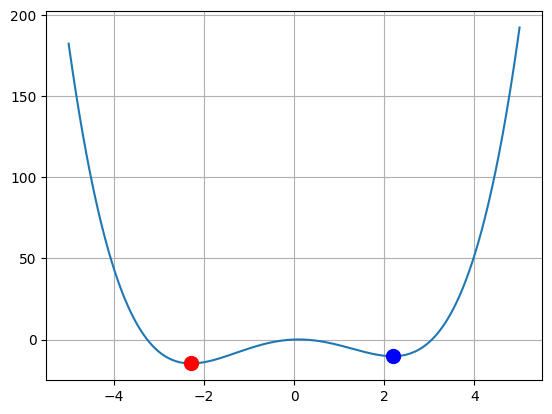

In [ ]:
x = np.linspace(-5,5,1000)
plt.plot(x, U(x))
plt.plot(g_min, U(g_min), marker='o', markersize=10, color='red')
plt.plot(loc_mi, U(loc_mi), marker='o', markersize=10, color='blue')
plt.grid(True)
plt.show()

### **(b)  Let's solve the gradient descent dynamics for various initial conditions with `odeint` in Python**

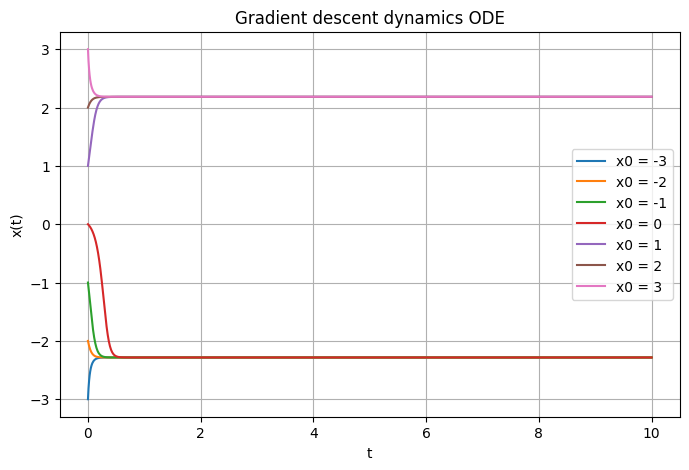

In [ ]:
# Gradient U'(x)
def dU_dx(x):
    return 2*x**3 - 10*x + 1

# Gradient descent dynamics
def grad_dd(x, t):
    return -dU_dx(x)

t = np.linspace(0, 10, 1000)

# Initial conditions
initial_conditions = [-3, -2, -1, 0, 1, 2, 3]

plt.figure(figsize=(8, 5))

for x0 in initial_conditions:
    sol = odeint(grad_dd, x0, t)
    plt.plot(t, sol, label=f"x0 = {x0}")

plt.title("Gradient descent dynamics ODE")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()


The plot shows that the gradient descent dynamics defined by the ODE converges to two different points, the local minima of the potential $U(x)$. The initial conditions $x_0=0, −1, −2, −3$ all converge to the global minimum of $U(x)$.

### **(c)  Let's solve the stochastic gradient descent dynamics with Euler–Maruyama scheme**

Stochastic Gradient Descent dynamics SDE :
$$
dX_t = -U'(X_t)\,dt + \sigma\, dW_t.
$$

- Euler–Maruyama Scheme
$$
X_{n+1}
= X_n - U'(X_n)\,\Delta t
+ \sigma \sqrt{\Delta t}\, Z_n,
$$
where $Z_n \sim \mathcal{N}(0,1)$.




**T = 10 and $\sigma = 1.0$**

Last value for x0 = 0.5 : 2.249868586278764
Last value for x0 = -2 : -2.080756464306514
Last value for x0 = -1 : -2.121600116469568
Last value for x0 = 3 : 2.1679108387932042


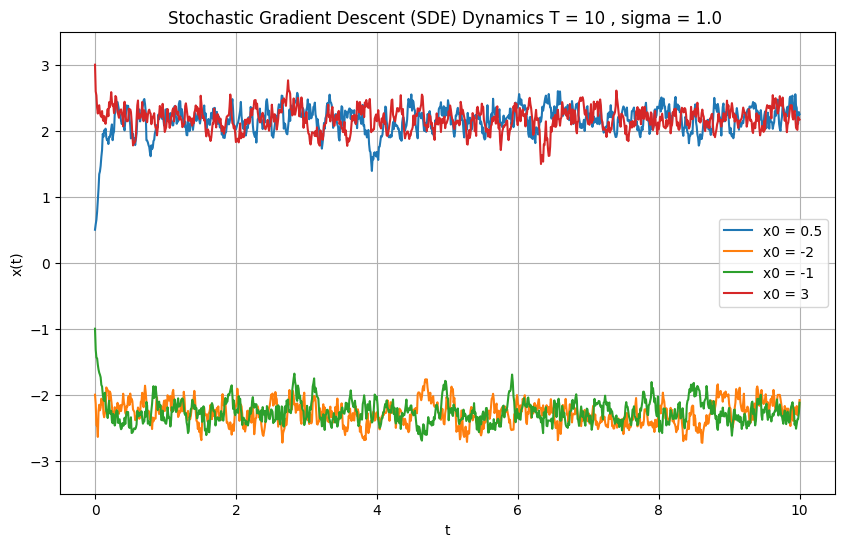

In [238]:
T = 10
dt = 0.01
n_iter = int(T/dt)
sigma = 1.0

# initial conditions
xo = [0.5 , -2 , -1, 3]
X = np.zeros((n_iter + 1, len(xo)))

for idx, val in enumerate(xo):
  X[0, idx] = val
  for i in range(n_iter):
    X0 = X[i, idx]
    Z = np.sqrt(dt)*np.random.randn()
    X[i+1, idx] = X0 - dU_dx(X0) * dt + sigma *  Z

# Plot
t = np.linspace(0, T, n_iter + 1)
plt.figure(figsize=(10, 6))

# Plot solve of SGDD for various intial conditions
for j in range(len(xo)):
  plt.plot(t, X[:,j], label=f'x0 = {xo[j]}')

for j, x0 in enumerate(xo):
    print(f"Last value for x0 = {x0} : {X[-1, j]}")

plt.title("Stochastic Gradient Descent (SDE) Dynamics T = 10 , sigma = 1.0 ")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.ylim(-3.5,3.5)
plt.grid(True)
plt.legend()
plt.show()

**T = 100 and $\sigma = 2.5$**

Last value for x0 = 0.5 : -2.083932436548645
Last value for x0 = -2 : -2.5638674877009446
Last value for x0 = -1 : 2.854712672835352
Last value for x0 = 3 : -1.8425616877748592


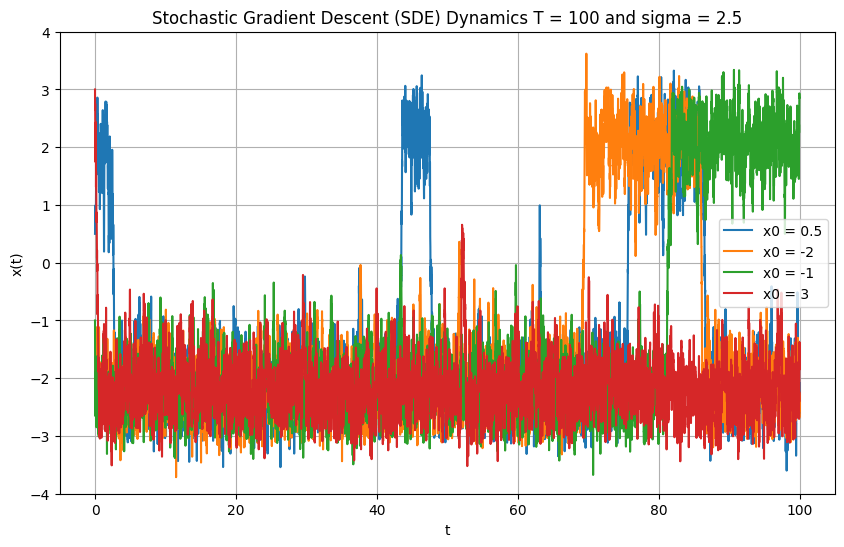

In [242]:
T = 100
dt = 0.01
n_iter = int(T/dt)
sigma = 2.5
xo = [0.5 , -2 , -1, 3] # initial conditions

X = np.zeros((n_iter + 1, len(xo)))

for idx, val in enumerate(xo):
  X[0, idx] = val
  for i in range(n_iter):
    X0 = X[i, idx]
    Z = np.sqrt(dt)*np.random.randn()
    X[i+1, idx] = X0 - dU_dx(X0) * dt + sigma *  Z

t = np.linspace(0, T, n_iter + 1)

plt.figure(figsize=(10, 6))

for j in range(len(xo)):
  plt.plot(t, X[:,j], label=f'x0 = {xo[j]}')

for j, x0 in enumerate(xo):
    print(f"Last value for x0 = {x0} : {X[-1, j]}")

plt.title("Stochastic Gradient Descent (SDE) Dynamics T = 100 and sigma = 2.5")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.ylim(-4,4)
plt.grid(True)
plt.legend()
plt.show()

### **(d) Decreasing  the noise in time according to $\sigma = \frac{\alpha}{t+1}$**

**$\alpha = 5$ and $T ≈ 10$ to $T ≈ 50$**

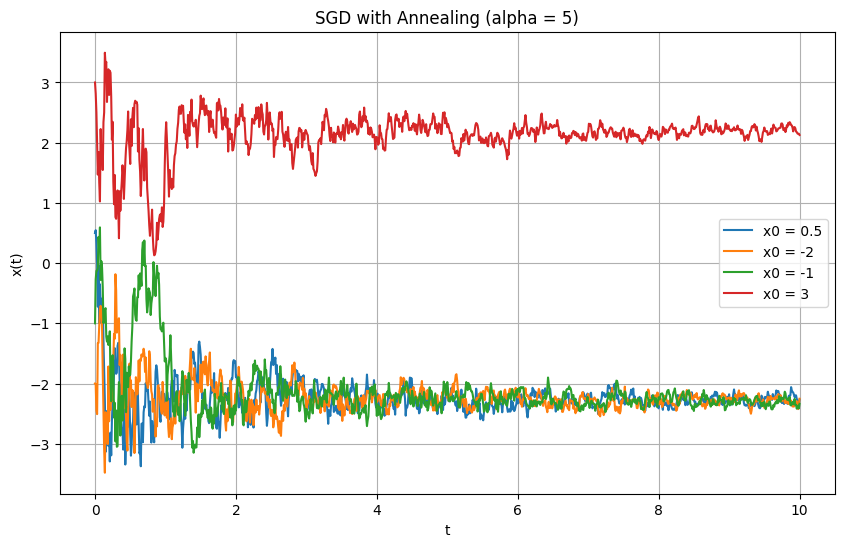

In [241]:
T = 10
dt = 0.01
n_iter = int(T/dt)
alpha = 5.0     # annealing exponent

# initial conditions
xo = [0.5, -2, -1, 3]
X = np.zeros((n_iter + 1, len(xo)))

# set initial values
X[0] = xo

for j in range(len(xo)):
    for i in range(n_iter):
        t_i = i * dt
        sigma_t = alpha / (t_i + 1 )   # annealing

        X0 = X[i, j]
        Z = np.sqrt(dt) * np.random.randn()

        X[i+1, j] = X0 - dU_dx(X0) * dt + sigma_t * Z

# Plot
t = np.linspace(0, T, n_iter + 1)
plt.figure(figsize=(10, 6))

for j in range(len(xo)):
    plt.plot(t, X[:, j], label=f'x0 = {xo[j]}')

plt.title("SGD with Annealing (alpha = 5)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()


**$\alpha = 5$  and $T ≈ 50$**

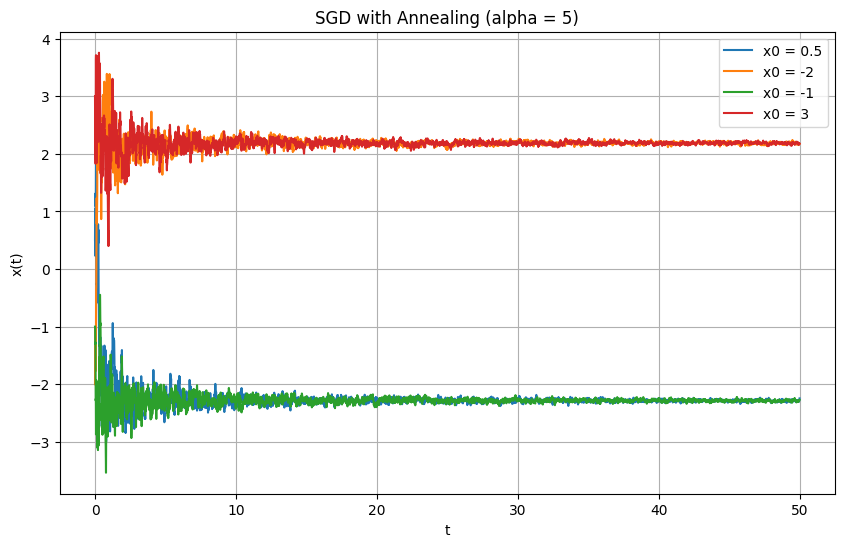

In [245]:
T = 50
dt = 0.01
n_iter = int(T/dt)
alpha = 5.0     # annealing exponent

# initial conditions
xo = [0.5, -2, -1, 3]
X = np.zeros((n_iter + 1, len(xo)))

# set initial values
X[0] = xo

for j in range(len(xo)):
    for i in range(n_iter):
        t_i = i * dt
        sigma_t = alpha / (t_i + 1)   # annealing

        X0 = X[i, j]
        Z = np.sqrt(dt) * np.random.randn()

        X[i+1, j] = X0 - dU_dx(X0) * dt + sigma_t * Z

# Plot
t = np.linspace(0, T, n_iter + 1)
plt.figure(figsize=(10, 6))

for j in range(len(xo)):
    plt.plot(t, X[:, j], label=f'x0 = {xo[j]}')

plt.title("SGD with Annealing (alpha = 5)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()


### **(e) Advantage of stochastic gradient descent over deterministic gradient descent**

The advantage of stochastic gradient descent is that its noise helps escape local minima, giving a better chance of reaching the global minimum.

## **Q3. Simulated annealing.**

### **(a) Let's find the global minimum of $V(x)$ on $\mathbb{R}$**

Consider the function:

$$
V(x) = x^2 \Bigl( 2 +  \sin(10x)^2 \Bigr), \quad x \in \mathbb{R}.
$$
We Know that  $$\sin(10x)  𝜖 [-1,1]$$  so  $$(2 + (sin(10x))^2) 𝜖 [1,3]$$
$(2 + (sin(10x))^2) > 0$ for all $x \in \mathbb{R}$ then
 $x^2$ determines the minimum. The global minimum is at $x=0$

$$
\text{global minimum is $x^*=0$,} and  \quad V(x^*) = 0
$$


### **(b)  Metropolis algorithm with simulated annealing to locate the global minimum of $V (x)$.**

In [246]:
def V(x):
  val = x**2 *(2 + np.sin(10*x)**2)
  return val

In [249]:
def metropolis_annealing(n, dt_unif, displacement = "normal" ):

  X1 =np.random.uniform(-10,10)
  X_sample = []
  V_sample = []
  mu = 0
  sigma = 0.5

  for i in range(1, n + 1 ):
    #Proposal

    if displacement == "normal":
      disp = np.random.normal(mu , sigma)
    elif displacement == "uniform":
      disp = np.random.uniform(-dt_unif , dt_unif)
    else:
      raise ValueError("Unknown proposal ")

    Xp = X1 + disp

    # Acceptance
    dV = V(Xp)- V(X1)
    beta = 1 + np.log(i)
    rho = min(1, np.exp(-beta * dV))

    if  np.random.rand() < rho:
      X1 = Xp

    X_sample.append(X1)
    V_sample.append(V(X1))

  return X_sample , V_sample

In [313]:
n = 500
X_unif, V_unif = metropolis_annealing(n, dt_unif= 10,  displacement = "uniform")
X_norm, V_norm = metropolis_annealing(n, dt_unif= 10, displacement = "normal")

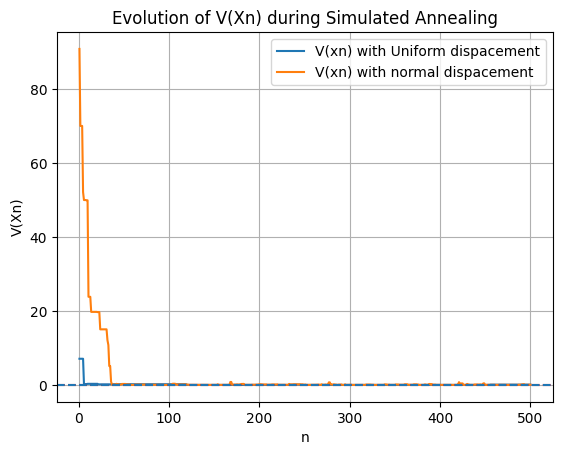

In [314]:
plt.plot(np.arange(1, n + 1), V_unif, label = "V(xn) with Uniform dispacement")
plt.plot(np.arange(1, n + 1), V_norm, label = "V(xn) with normal dispacement")
plt.axhline(V(X_unif[-1]), linestyle='--', color='red')
plt.axhline(V(X_norm[-1]), linestyle='--')
plt.title("Evolution of V(Xn) during Simulated Annealing")
plt.xlabel("n")
plt.ylabel("V(Xn)")
plt.legend()
plt.grid(True)
plt.show()

$V(X_n)$ converge to 0

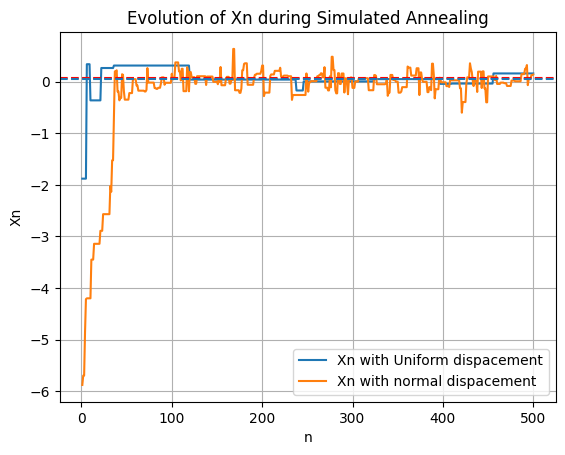

In [316]:
plt.plot(np.arange(1, n + 1), X_unif, label = "Xn with Uniform dispacement")
plt.plot(np.arange(1, n + 1), X_norm, label = "Xn with normal dispacement")
plt.axhline(V(X_unif[-1]), linestyle='--', color='red')
plt.axhline(V(X_norm[-1]), linestyle='--')
plt.title("Evolution of Xn during Simulated Annealing")
plt.xlabel("n")
plt.ylabel("Xn")
plt.legend()
plt.grid(True)
plt.show()

## **Q4 - Graph coloring**
Every planar graph can be colored using only four colours such that no two adjacent nodes have the same color. Finding such a coloring for a planar graph of $m$ nodes is a difficult optimization problem, since the size of the solution space is $4^m$. The cost function for this problem is the number of adjacent nodes with the same coloring.


### **(a) Planar graph with 10 nodes (planar means no edge crossings) and enter its adjacency matrix.**

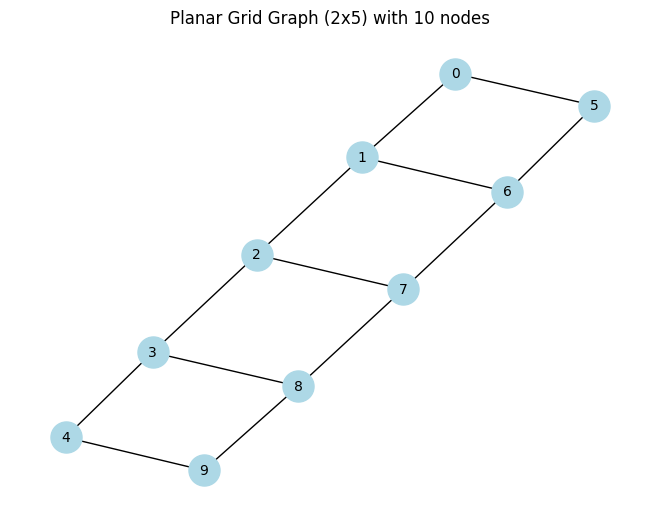

In [233]:
G = nx.grid_2d_graph(2, 5)
G = nx.convert_node_labels_to_integers(G)

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Planar Grid Graph (2x5) with 10 nodes")
plt.show()

In [234]:
# adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()
print(adj_matrix)

[[0 1 0 0 0 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 0 1 0 0]
 [0 0 1 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 1 0]]


### **(b) Let's generate a vector of size 10 that contains random colors coded as 1, 2, 3, and 4**

Node colors: [2 4 2 1 4 2 3 2 1 1]


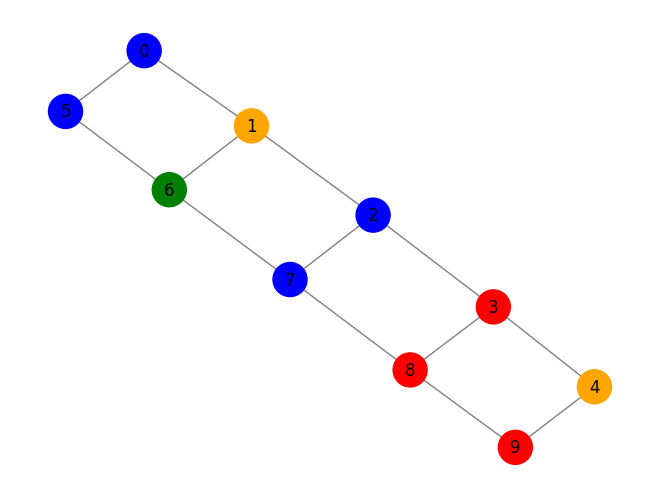

In [305]:
# Generate random
colors = np.random.randint(1, 5, size=10)
# Map  colors
color_map = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}
node_colors = [color_map[c] for c in colors]

print("Node colors:", colors)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=600, edge_color='gray')
plt.show()

### **(c) Cost function of the problem**

In [306]:
def coloring_cost(adj_matrix, color_vector):

    n = len(color_vector)
    cost = 0
    for i in range(n):
        for j in range(i+1, n):
            if adj_matrix[i, j] == 1 and color_vector[i] == color_vector[j]:
                cost += 1
    return cost

In [307]:
colors = np.random.randint(1,5,10)
cost = coloring_cost(adj_matrix, colors)
print("Cost of coloring:", cost)

Cost of coloring: 4


### **(d) Simulated annealing to find an optimal coloring of the graph.**

In [308]:
def simulated_annealing(adj_matrix, initial_colors, n_colors=4, n_iter=5000, T0=10, alpha=0.995):

    n = adj_matrix.shape[0]
    colors = initial_colors.copy()
    cost = coloring_cost(adj_matrix, colors)

    T = T0
    best_colors = colors.copy()
    best_cost = cost

    for it in range(n_iter):

        node = np.random.randint(0, n)
        old_color = colors[node]
        new_color = np.random.randint(1, n_colors + 1)

        while new_color == old_color:
            new_color = np.random.randint(1, n_colors + 1)

        colors[node] = new_color
        new_cost = coloring_cost(adj_matrix, colors)

        # Metropolis
        # Acceptance
        delta = new_cost - cost
        rho =  np.exp(-delta / T)

        if delta < 0 or np.random.rand() < rho:
            cost = new_cost
            if cost < best_cost:
                best_cost = cost
                best_colors = colors.copy()
        else:
            # Revert change
            colors[node] = old_color

        # Cool down
        T *= alpha

    return best_colors, best_cost

In [309]:
colors = np.random.randint(1, 5, size=adj_matrix.shape[0])

opt_colors, opt_cost = simulated_annealing(adj_matrix, initial_colors=colors, n_colors=4)
print("Optimal cost:", opt_cost)
print("Optimal coloring:", opt_colors)

Optimal cost: 0
Optimal coloring: [1 4 1 4 1 3 2 3 1 2]


**Plot of graph**

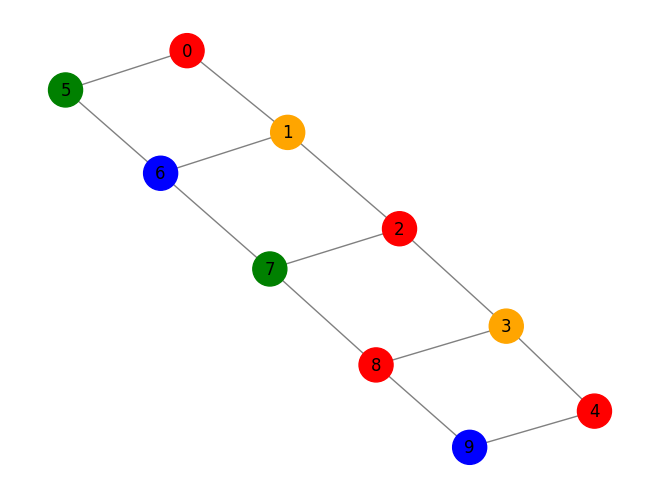

In [310]:
color_map = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}
node_colors = [color_map[c] for c in opt_colors]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=600, edge_color='gray')
plt.show()

**Reference**


- ML822 Monte Carlo notes: Secs 3.3-3.5 of Chap. 3.
- AM783 Markov Processes notes: Secs 5.1-5.4 of Chap. 5.